In [1]:
import numpy as np
from scipy.signal import freqs, iirfilter

In [2]:
# 減衰定数
a1 = 1
a2 = 1

# 結合効率
k0 = 0.65
k1 = 0.17
k2 = 0.43

# 結合損
eta = 1

# リング周長
L = 2.284e-4

# 屈折率
n = 3.3938

# 屈折率変化
dn1 = 0
dn2 = 0
dn3 = 0

# 波長レンジ
l = np.array(range(1545000, 1555000)) * 1e-12

$$
C(\kappa) = \frac{1}{-i \cdot \eta \cdot \sqrt{\kappa}} \cdot
\begin{bmatrix}
1 & - \eta \cdot \sqrt{\eta - \kappa} \\
(\sqrt{\eta - \kappa}) \cdot \eta & - \eta^2
\end{bmatrix}
$$

In [3]:
def C(k):
    return 1 / (-1j * eta * np.sqrt(k)) * np.matrix([
        [1, - eta * np.sqrt(eta - k)],
        [np.sqrt(eta - k) * eta, - eta**2]
    ])

$$
R(\lambda) =
\begin{bmatrix}
\frac{1 \cdot e^{\frac{i \pi \cdot L \cdot n}{\lambda}}}{a_1^{\frac{1}{2}}} & 0 \\
0 & a_1^{\frac{1}{2}} \cdot e^{\frac{-i \pi \cdot L \cdot n}{\lambda}}
\end{bmatrix}
$$

In [4]:
def R(l):
    return np.matrix([
        [np.exp(1j * np.pi * L * n / l ) / a1**(1/2), 0],
        [0, np.exp(-1j * np.pi * L * n / l ) * a1**(1/2)]
    ])

$$
M(K_0, K_1, K_2, \lambda) = C(K_2) \cdot R(\lambda) \cdot C(K_1) \cdot R(\lambda) \cdot C(K_0)
$$

In [5]:
def M (_k0, _k1, _k2, _l):
    return C(_k2) * R(_l) * C(_k1) * R(_l) * C(_k0)

$$
D(K_0, K_1, K_2, \lambda) = \frac{1}{M(K_0, K_1, K_2, \lambda)_{0,0}}
$$

In [6]:
def D(_k0, _k1, _k2, _l):
    return 1 / M (_k0, _k1, _k2, _l)[0, 0]

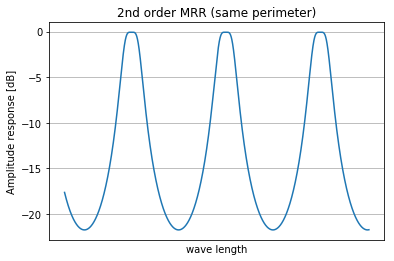

In [7]:
import matplotlib.pyplot as plt
plt.semilogx(l, [20 * np.log10(abs(D(k0, k1, k2, x))) for x in l])
plt.xlabel('wave length')
plt.ylabel('Amplitude response [dB]')
plt.title('2nd order MRR (same perimeter)')
plt.grid()
plt.show()